## AI-HUB

In [56]:
import os
from sklearn.model_selection import StratifiedShuffleSplit
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
import torch

# 데이터 경로 설정
root_dir = 'D:/data_aihub_normal/train'
train_dataset = ImageFolder(root=root_dir)

root_dir = 'D:/data_aihub_normal/val'
test_dataset = ImageFolder(root=root_dir)

In [57]:
train_dataset.class_to_idx

{'IN1': 0, 'IN2': 1, 'IN3': 2, 'PJ1': 3, 'PJ2': 4}

In [58]:
test_dataset.class_to_idx

{'IN': 0, 'PJ': 1}

## Sewer-ML

In [1]:
import os
from sklearn.model_selection import StratifiedShuffleSplit
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
import torch

# 데이터 경로 설정
train_dir = 'D:/Sewer-ML/train'
val_dir = 'D:/Sewer-ML/valid'
test_dir = 'D:/Sewer-ML/test'

In [2]:
import glob

for path in [train_dir, val_dir, test_dir]:
    file_count = len(glob.glob(path + '/*'))
    print(str(path), "#data:", file_count)

D:/Sewer-ML/train #data: 1040129
D:/Sewer-ML/valid #data: 130046
D:/Sewer-ML/test #data: 130026


In [1]:
import pandas as pd
train_info = pd.read_csv('D:/Sewer-ML/SewerML_Train.csv')
val_info = pd.read_csv('D:/Sewer-ML/SewerML_Val.csv')
test_info = pd.read_csv('D:/Sewer-ML/SewerML_Test.csv')

In [2]:
test_info

,Filename
0,00000062.png
1,00000063.png
2,00000064.png
3,00000065.png
4,00000066.png
...,...
130021,01299552.png
130022,01299553.png
130023,01299554.png
130024,01299555.png


In [44]:
val_info

,Filename,WaterLevel,VA,RB,OB,PF,DE,FS,IS,RO,...,BE,FO,GR,PH,PB,OS,OP,OK,ND,Defect
0,00000048.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000049.png,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,00000050.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,00000051.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00000052.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130041,01299736.png,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130042,01299737.png,10,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
130043,01299738.png,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
130044,01299739.png,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_info

,Filename,WaterLevel,VA,RB,OB,PF,DE,FS,IS,RO,...,BE,FO,GR,PH,PB,OS,OP,OK,ND,Defect
0,00000001.png,10,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,00000002.png,10,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,00000003.png,10,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00000004.png,10,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,00000005.png,10,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040124,01300197.png,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1040125,01300198.png,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1040126,01300199.png,40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1040127,01300200.png,40,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [11]:
import pandas as pd

# train_info
print("train_info")
train_matrix = pd.crosstab(index=train_info['Defect'], columns=train_info['ND'], margins=True)
print(train_matrix)
print("\n" + "="*30 + "\n")

# val_info
print("val_info")
val_matrix = pd.crosstab(index=val_info['Defect'], columns=val_info['ND'], margins=True)
print(val_matrix)

train_info
ND           0       1      All
Defect                         
0        86550  466270   552820
1       487309       0   487309
All     573859  466270  1040129


val_info
ND          0      1     All
Defect                      
0       10874  57807   68681
1       61365      0   61365
All     72239  57807  130046


--- Case: Defect0_ND0 (총 86550개 이미지) ---
--------------------------------------------------


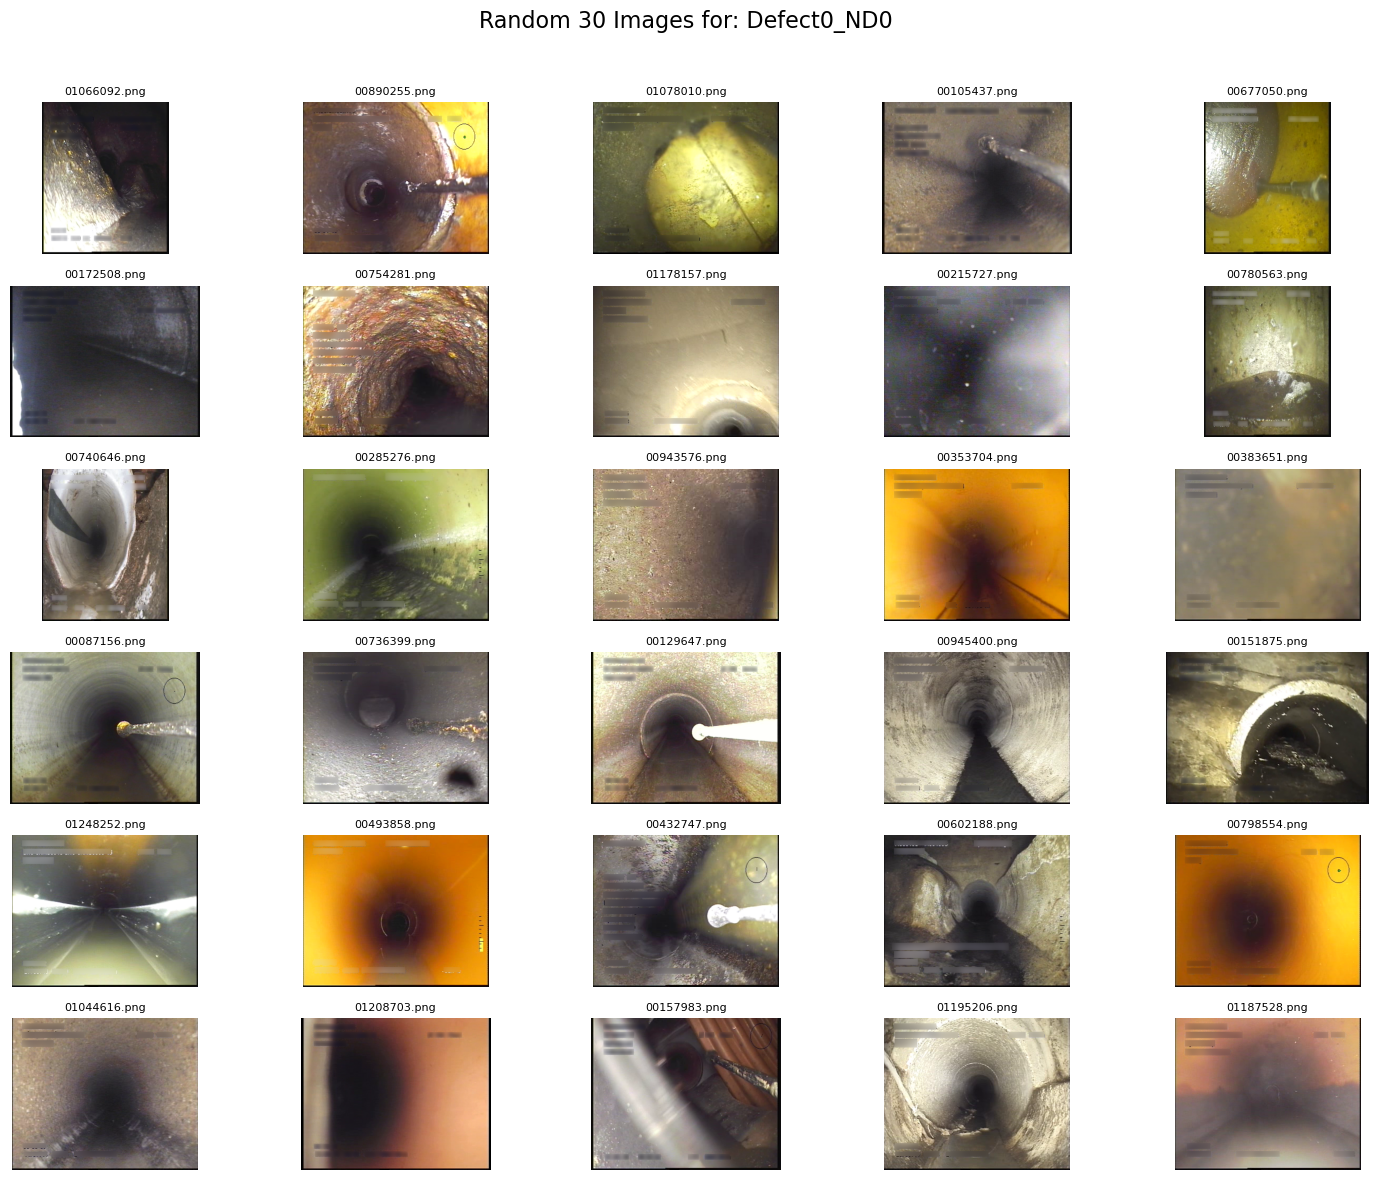

In [36]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# 이전에 정의된 변수들을 사용합니다.
# train_dir = 'D:/Sewer-ML/train'
# train_info = pd.read_csv('D:/Sewer-ML/SewerML_Train.csv')

# --- 1. 네 가지 경우에 대해 데이터프레임 필터링 ---
cases = {
    "Defect0_ND0": train_info[(train_info['Defect'] == 0) & (train_info['ND'] == 0)],
    #"Defect0_ND1": train_info[(train_info['Defect'] == 0) & (train_info['ND'] == 1)],
    #"Defect1_ND0": train_info[(train_info['Defect'] == 1) & (train_info['ND'] == 0)],
    #"Defect1_ND1": train_info[(train_info['Defect'] == 1) & (train_info['ND'] == 1)]
}

# --- 2. 각 경우에 대해 이미지 20개씩 시각화 및 저장 ---
for case_name, case_df in cases.items():
    print(f"--- Case: {case_name} (총 {len(case_df)}개 이미지) ---")

    # 샘플링할 이미지가 20개 이상 있는지 확인
    num_samples = min(30, len(case_df))

    if num_samples > 0:
        # 지정된 개수만큼 랜덤 샘플 추출
        sample_df = case_df.sample(n=num_samples, random_state=3) # 재현성을 위해 random_state 설정

        # 4행 5열의 서브플롯 생성
        fig, axes = plt.subplots(6, 5, figsize=(15, 12))
        fig.suptitle(f'Random {num_samples} Images for: {case_name}', fontsize=16)
        axes = axes.flatten() # 2D 배열을 1D로 변환하여 쉽게 사용

        for i, (idx, row) in enumerate(sample_df.iterrows()):
            img_filename = row['Filename']
            img_path = os.path.join(train_dir, img_filename)
            
            ax = axes[i]
            try:
                img = mpimg.imread(img_path)
                ax.imshow(img)
                ax.set_title(img_filename, fontsize=8) # 파일명 표시
                ax.axis('off') # 축 숨기기
            except FileNotFoundError:
                ax.text(0.5, 0.5, 'Image\nNot Found', ha='center', va='center')
                ax.axis('off')
        
        # 남는 서브플롯은 보이지 않게 처리
        for j in range(num_samples, len(axes)):
            axes[j].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        

    
    print("-" * 50)